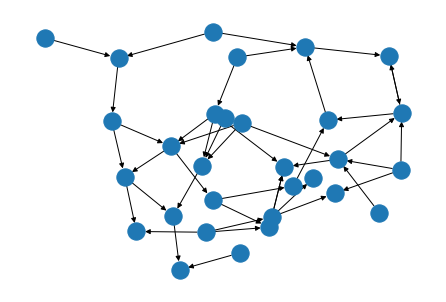

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [2]:
def surf(probability, n):
    
    # Prepare to record the surfers.
    surfers = []
    rank = []
    
    # Start with the first surfer.
    surfer = np.random.choice(g.nodes)
    
    # Surff.
    for i in range(n):
        if np.random.rand() < probability and len([i for i in g.neighbors(surfer)]) != 0:
            surfer = np.random.choice([i for i in g.neighbors(surfer)])
        else:
            surfer = np.random.choice(g.nodes)
        surfers.append(surfer)
    
    # Compute the rank.
    for i in range(max(g.nodes) + 1):
        rank.append(surfers.count(i)/n)
    
    # Return the absolute difference between the two.
    return [nx.pagerank(g)[i] for i in range(len(nx.pagerank(g)))] - np.array(rank)

<ipython-input-2-a1444e245873>:20: RuntimeWarning: invalid value encountered in long_scalars
  rank.append(surfers.count(i)/n)


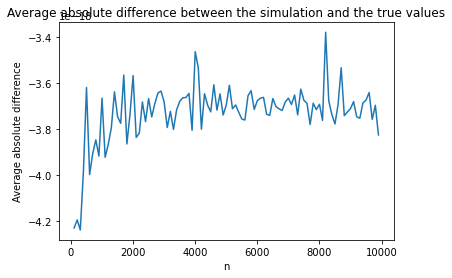

In [5]:
av_abs_dif = []
probability = 0.85
ns = np.arange(0, 10000, 100)

for n in ns:
    average = []
    for i in range(100):
        average.append(np.mean(surf(probability, n)))
    av_abs_dif.append(np.mean(average))
    
plt.plot(ns, av_abs_dif)
plt.title('Average absolute difference between the simulation and the true values')
plt.xlabel('n')
plt.ylabel('Average absolute difference')
plt.show()